In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
HOME = os.getcwd()
train_csv = os.path.join(HOME, 'scikit-learn\\data\\titanic\\train.csv')

# train.csv를 읽어오기
train_df = pd.read_csv(train_csv)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


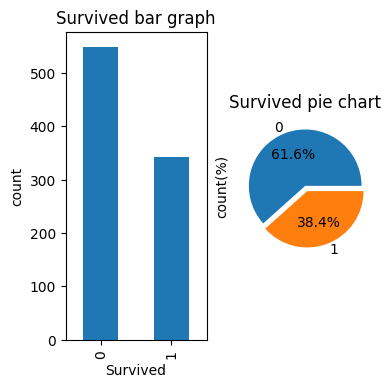

In [4]:
# 생존 여부의 시각화(생각해 볼 포인트: 어떤 그래프를 그리는 것이 좋을까?)

# 1. bar or barh graph [0]
# 1행 2열로 그래프를 그리려면? 가로 길이 12, 세로 길이 6
f, ax = plt.subplots(1,2,figsize=(12,6))
train_df['Survived'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Survived bar graph')
ax[0].set_ylabel('count')


# 2. pie chart [1]
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=False,figsize=(4,4), ax=ax[1])
ax[1].set_title('Survived pie chart')
ax[1].set_ylabel('count(%)')

plt.show()

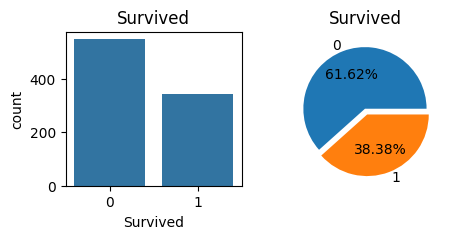

In [5]:
# 생존 여부 분포 시각화
f,ax=plt.subplots(1,2,figsize=(5,2))

# seaborn 최신 버전에서는 x 파라미터를 명시적으로 지정해야 함
sns.countplot(x='Survived', data=train_df, ax=ax[0])
ax[0].set_title('Survived')

train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('')

plt.show()

In [6]:
# Age의 통계치를 확인   minMax(0.42, 80) -> bins 20으로 설정하면
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

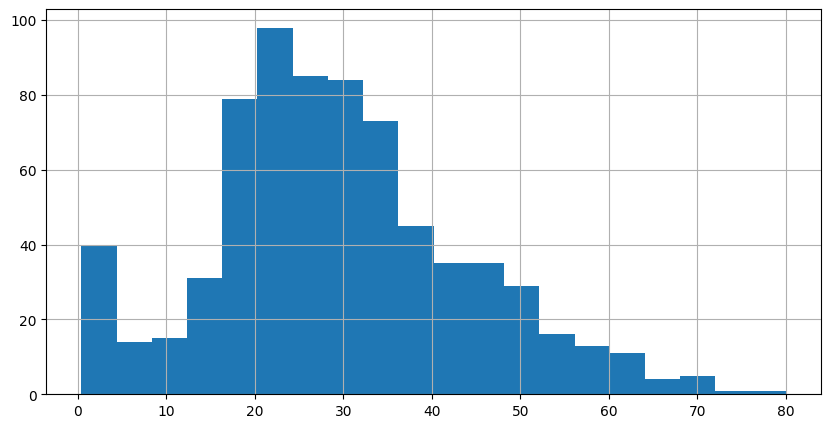

In [7]:
# 나이 분포(Histogram)
# 나이 전체를 몇 개로 나눌지 결정 -> bins
train_df['Age'].hist(bins=20, figsize=(10,5))
plt.show()

In [8]:
# 선실 등급별 평균 생존율, 평균 나이, 평균 요금, 가족(sibsp, Parch) 수
train_df.groupby('Pclass').agg({'Survived':'mean', 'Age':'mean', 'Fare':'mean', 'SibSp':'mean', 'Parch':'mean'})

,Survived,Age,Fare,SibSp,Parch
Pclass,,,,,
1,0.629630,38.233441,84.154687,0.416667,0.356481
2,0.472826,29.877630,20.662183,0.402174,0.380435
3,0.242363,25.140620,13.675550,0.615071,0.393075


In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)

In [11]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [12]:
# 'Sex', 'Embarked'를 label encoder를 사용해 수치로 변환
from sklearn.preprocessing import LabelEncoder

# 1. 레이블 인코드 생성
label_encoder = LabelEncoder()

# 2. 'Sex'와 'Embarked'를 레이블 인코딩
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

In [13]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


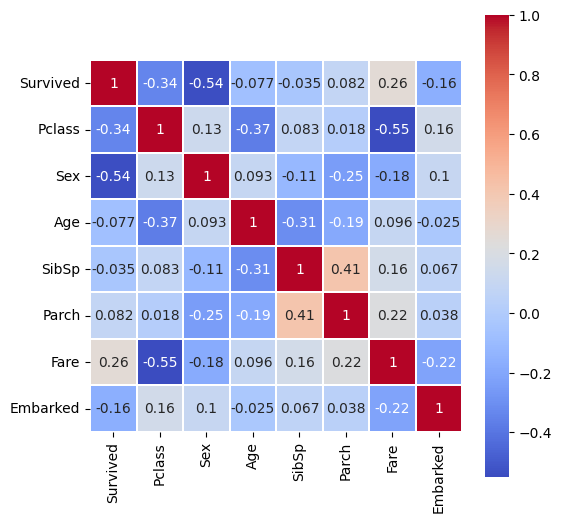

In [14]:
# 상관관계(벡터의 상관관계)
# pandas에서 corr()를 seaborn의 heatmap으로 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(train_df.drop('Name', axis=1).corr(), annot=True, cmap='coolwarm',square=True, linecolor="white", linewidths=0.01)
plt.show()

In [15]:
# train['Age']에 대한 결측치 평균값으로 채우기
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [16]:
# Kaggle 노트북을 보면, 나이를 숫자로 그대로 사용하지 않고, 구간을 정해서 사용
# 0~3세, 4~7세, 8~15세, 16~30세, 31~60세, 61~81세
train_df['Age_cat'] = pd.cut(train_df['Age'], bins=[0,3,7,15,30,60,81], labels=['baby','children','teenage','young','adult','elder'])
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,young
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,adult
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,young
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,adult
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,adult


In [17]:
# 'Age_cat'을 기준으로 groupby
train_df.groupby(['Age_cat'], observed=True)['Survived'].mean()

Age_cat
baby        0.666667
children    0.700000
teenage     0.454545
young       0.335984
adult       0.420495
elder       0.227273
Name: Survived, dtype: float64

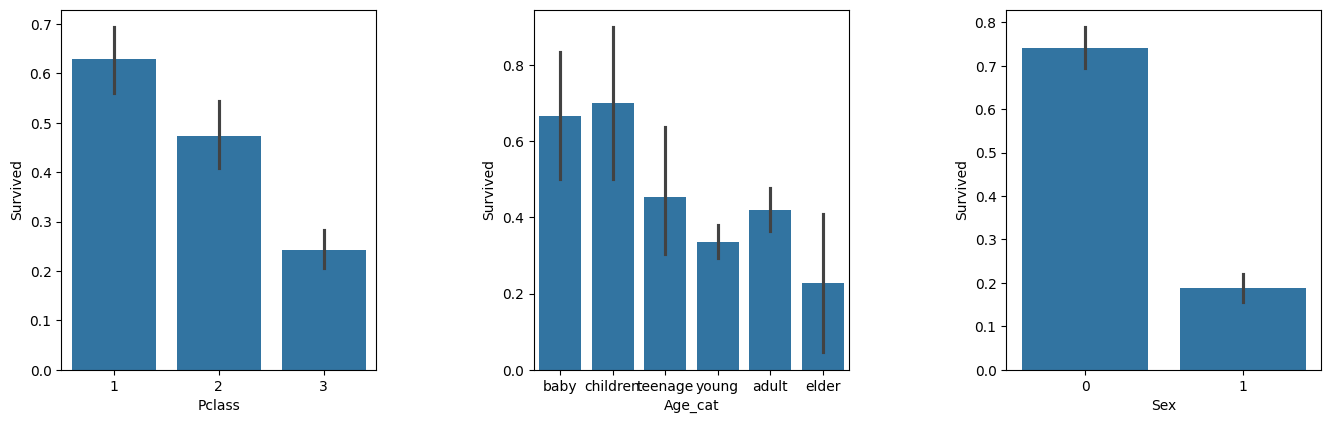

In [18]:
# 등급, 나이대, 성별에 따른 생존률 시각화

plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.subplot(132)
sns.barplot(x='Age_cat', y='Survived', data=train_df)
plt.subplot(133)
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()


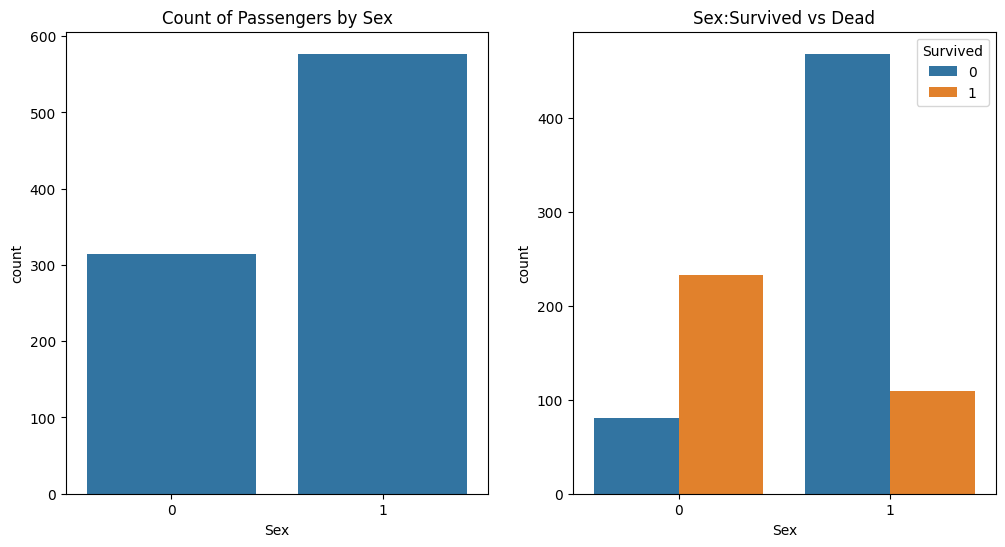

In [19]:
# 성별에 따른 생존 여부 시각화
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='Sex', data=train_df, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot(x='Sex', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [20]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,7.2500,2,young
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,71.2833,0,adult
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,7.9250,2,young
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,53.1000,2,adult
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,8.0500,2,adult
5,0,3,"Moran, Mr. James",1,29.699118,0,0,8.4583,1,young
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,51.8625,2,adult
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,21.0750,2,baby
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,11.1333,2,young
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,30.0708,0,teenage


In [21]:
# 0행의 이름을 가져와서, 콤마로 분리, 점으로 분리, 공백 제거
train_df['Name'][0].split(',')[1].split('.')[0].strip()

'Mr'

In [22]:
# 위의 이름을 분리하는(신분만 취하는) 코드를 사용하여 람다 함수 생성
# 그 사람의 신분을 나타내는 것을 title
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
train_df['Title'] = train_df['Name'].map(conversion_rare)

# 신분에서 중복되는 것을 하나로 합치고, unique한 목록만 출력
titles = train_df['Title'].unique()
print(titles)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [23]:
# ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady' 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
# 위의 호칭중에 중복된 것들을 제거한다.
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

for each in Rare:
    train_df['Title'] = train_df['Title'].replace(each, 'Rare')

train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Rare'], dtype=object)

In [24]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,young,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,adult,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,young,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,adult,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,adult,Mr


In [25]:
# get_dummies를 이용해 Pclass, Sex, Age, Embarked, Age_cat, Title을 원-핫 인코딩하기
import pandas as pd
from pandas import get_dummies

train_df2 = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Age', 'Embarked', 'Age_cat', 'Title'])
train_df2.head()

,Survived,Name,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,...,Age_cat_baby,Age_cat_children,Age_cat_teenage,Age_cat_young,Age_cat_adult,Age_cat_elder,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,"Braund, Mr. Owen Harris",1,0,7.2500,False,False,True,False,True,...,False,False,False,True,False,False,False,True,False,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,71.2833,True,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,1,"Heikkinen, Miss. Laina",0,0,7.9250,False,False,True,True,False,...,False,False,False,True,False,False,True,False,False,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,53.1000,True,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
4,0,"Allen, Mr. William Henry",0,0,8.0500,False,False,True,False,True,...,False,False,False,False,True,False,False,True,False,False


3. 전처리(Preprocessing)

In [26]:
train_df.

SyntaxError: invalid syntax (3792043976.py, line 1)